In [1]:
from micrograd.micrograd.engine import Value
from draw_utils import draw_dot, fix_axes_style, COLOR_PINK
import numpy as np
import matplotlib.pyplot as plt

sub


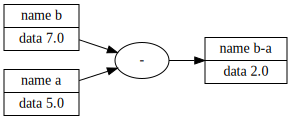

In [2]:
a = Value(data=5, label='a')
b = Value(data=7, label='b')
c = b - a
draw_dot(c)

$\Large{lim_{h\to 0}\frac{f(x+h) - f(x)}{h}}$

/tmp/ipykernel_37803/918715423.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.gcf().show()


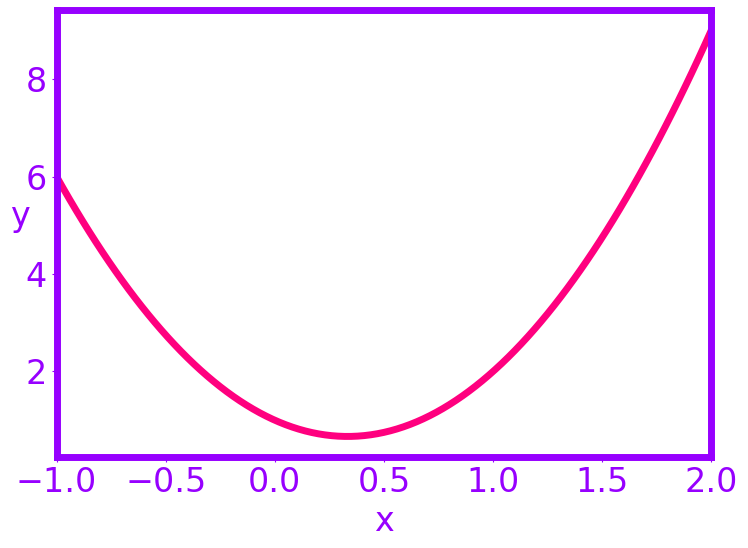

In [3]:
def f(x):
    return 3*x**2 - 2*x + 1
xs = np.linspace(-1,2,101)
ys = f(xs)

plt.rcParams['font.size']=24
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.plot(xs,ys,c=COLOR_PINK,lw=5)
ax.set_xlim(-1,2)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=0)
fix_axes_style(ax)
plt.tight_layout()
plt.gcf().savefig('pics/test.png', transparent=True)
plt.gcf().show()